## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


PROJECT OVERVIEW

The company sees all the other big companies creating original video content and want to join in to the fun but lack industry knowledge to join in the firm. I analyzed movie data and the goal is to know what kind of movies the company should focus on.

PROJECT OBJECTIVES

Exploring what types of films are currently doing the best at the box office then translate those findings into actionable insights that the company's new movie studio can use to help decide what type of films to create.

DATA SOURCE 

 From tn.movie_budgets.csv and tmdb.movies.csv files

In [103]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np

Start by reading the first dataset

In [104]:
#load the dataset 
tmdb_df = pd.read_csv("tmdb.movies.csv")
#Read the first five rows
tmdb_df.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [105]:
#check for the data info
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


Clean the dataset

In [106]:
#check for missing values
tmdb_df.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

There are no missing values

In [107]:
#drop duplicates
tmdb_df.drop_duplicates(subset='original_title')

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [108]:
#Drop rows with missing values
tmdb_df = tmdb_df.dropna(subset=['original_title'])


In [109]:
#convert release_time to datetime fomart
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'], errors='coerce')


In [110]:
#create a column for release year
tmdb_df['year'] = tmdb_df['release_date'].dt.year


In [111]:
#select the needed columns
tmdb_df = tmdb_df[['original_title', 'genre_ids', 'popularity', 'vote_average', 'vote_count', 'year']]


In [112]:
#check the cleaned dataset
tmdb_df.info()
tmdb_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  26517 non-null  object 
 1   genre_ids       26517 non-null  object 
 2   popularity      26517 non-null  float64
 3   vote_average    26517 non-null  float64
 4   vote_count      26517 non-null  int64  
 5   year            26517 non-null  int32  
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 1.1+ MB


,original_title,genre_ids,popularity,vote_average,vote_count,year
0,Harry Potter and the Deathly Hallows: Part 1,"[12, 14, 10751]",33.533,7.7,10788,2010
1,How to Train Your Dragon,"[14, 12, 16, 10751]",28.734,7.7,7610,2010
2,Iron Man 2,"[12, 28, 878]",28.515,6.8,12368,2010
3,Toy Story,"[16, 35, 10751]",28.005,7.9,10174,1995
4,Inception,"[28, 878, 12]",27.920,8.3,22186,2010


In [113]:
#save the cleaned dataset to a new csv file
tmdb_df.to_csv("cleaned_tmdb_movies.csv", index=False)


Now let us clean the second dataset

In [114]:
#load the file
tn_df = pd.read_csv("tn.movie_budgets.csv")
#display the first five rows
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [115]:
#check the info
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Now let us clean the dataset

In [116]:
#check for missing values
tn_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [117]:
#remove duplicates
tn_df.drop_duplicates(subset='movie')


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


We will now be converting the money columns

In [118]:
# Remove dollars and commas from relevant columns 
cols_to_clean = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in cols_to_clean:
  tn_df[col] = tn_df[col].replace(r'[\$,]', '', regex=True)
# Convert to numeric
for col in cols_to_clean:
    tn_df[col] = pd.to_numeric(tn_df[col], errors='coerce')
# cast to Int64 for large integers and null support
for col in cols_to_clean:
    tn_df[col] = tn_df[col].astype('Int64')


In [119]:
#convert relese time to date fomart
tn_df['release_date'] = pd.to_datetime(tn_df['release_date'])


In [120]:
#create a column for release year
tn_df['year'] = tn_df['release_date'].dt.year


In [121]:
#remain with the useful columns
tn_df = tn_df[['movie', 'production_budget', 'domestic_gross', 'worldwide_gross', 'year']]


In [122]:
#check for the new cleaned data
tn_df.info()
tn_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie              5782 non-null   object
 1   production_budget  5782 non-null   Int64 
 2   domestic_gross     5782 non-null   Int64 
 3   worldwide_gross    5782 non-null   Int64 
 4   year               5782 non-null   int32 
dtypes: Int64(3), int32(1), object(1)
memory usage: 220.3+ KB


,movie,production_budget,domestic_gross,worldwide_gross,year
0,Avatar,425000000,760507625,2776345279,2009
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,Dark Phoenix,350000000,42762350,149762350,2019
3,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


Save the new cleaned dataset

In [123]:
#save the dataset to a new csv file
tn_df.to_csv("cleaned_tn_movie_budgets.csv", index=False)


After cleaning the datasets we are going to merge them for analysis

In [124]:
#load the two cleaned datasets
pd.read_csv("cleaned_tmdb_movies.csv")


,original_title,genre_ids,popularity,vote_average,vote_count,year
0,Harry Potter and the Deathly Hallows: Part 1,"[12, 14, 10751]",33.533,7.7,10788,2010
1,How to Train Your Dragon,"[14, 12, 16, 10751]",28.734,7.7,7610,2010
2,Iron Man 2,"[12, 28, 878]",28.515,6.8,12368,2010
3,Toy Story,"[16, 35, 10751]",28.005,7.9,10174,1995
4,Inception,"[28, 878, 12]",27.920,8.3,22186,2010
...,...,...,...,...,...,...
26512,Laboratory Conditions,"[27, 18]",0.600,0.0,1,2018
26513,_EXHIBIT_84xxx_,"[18, 53]",0.600,0.0,1,2018
26514,The Last One,"[14, 28, 12]",0.600,0.0,1,2018
26515,Trailer Made,"[10751, 12, 28]",0.600,0.0,1,2018


In [125]:
pd.read_csv("cleaned_tn_movie_budgets.csv")

,movie,production_budget,domestic_gross,worldwide_gross,year
0,Avatar,425000000,760507625,2776345279,2009
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,Dark Phoenix,350000000,42762350,149762350,2019
3,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
...,...,...,...,...,...
5777,Red 11,7000,0,0,2018
5778,Following,6000,48482,240495,1999
5779,Return to the Land of Wonders,5000,1338,1338,2005
5780,A Plague So Pleasant,1400,0,0,2015


We will now standardise the movie titles

In [126]:
tn_df['movie'] = tn_df['movie'].str.lower().str.strip()
tmdb_df['original_title'] = tmdb_df['original_title'].str.lower().str.strip()


We will now merge the two datasets

In [127]:
merged_df = pd.merge(tn_df,tmdb_df, left_on ='movie', right_on = 'original_title')

In [128]:
#drop the duplicated columns
merged_df = merged_df.drop(columns=['original_title'])


Now let us save the cleaned merged dataset

In [129]:
merged_df.to_csv("cleaned_merged_movies.csv", index=False)


In [130]:
#check on the merged dataset
#display the first five rows
merged_df.head()

,movie,production_budget,domestic_gross,worldwide_gross,year_x,genre_ids,popularity,vote_average,vote_count,year_y
0,avatar,425000000,760507625,2776345279,2009,"[28, 12, 14, 878]",26.526,7.4,18676,2009
1,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875,2011,"[12, 28, 14]",30.579,6.4,8571,2011
2,avengers: age of ultron,330600000,459005868,1403013963,2015,"[28, 12, 878]",44.383,7.3,13457,2015
3,avengers: infinity war,300000000,678815482,2048134200,2018,"[12, 28, 14]",80.773,8.3,13948,2018
4,justice league,300000000,229024295,655945209,2017,"[28, 12, 14, 878]",34.953,6.2,7510,2017


We will now calculate the ptofit and ROI which will help us in our analysis

In [131]:
#calculate the profit
merged_df['profit'] = merged_df['worldwide_gross'] - merged_df['production_budget']


In [132]:
#calculate the ROI
merged_df['roi'] = merged_df['profit'] / merged_df['production_budget']

Since we have two years 'x' and 'y' we will need one to make our analysis more clear and understandable

In [133]:
#check both if they have similar values remain with one
print(merged_df[['year_x', 'year_y']].head())


   year_x  year_y
0    2009    2009
1    2011    2011
2    2015    2015
3    2018    2018
4    2017    2017


In [134]:
#rename the correct one to year
merged_df['year'] = merged_df['year_x'] 


In [135]:
#drop the other one
merged_df.drop(columns=['year_x', 'year_y'], inplace=True)


We will now save the final merged dataset with 'profits' , 'roi' and 'year' which will help us in our visualisations

In [136]:
merged_df.to_csv("final_merged_movies_roi_profit_year.csv", index=False)


Now we are going to make visualisations which will help us in our movie analysis

In [137]:
#import the necessary code cells
import matplotlib.pyplot as plt
import seaborn as sns

We are going to look at the average profit over the last 10 years

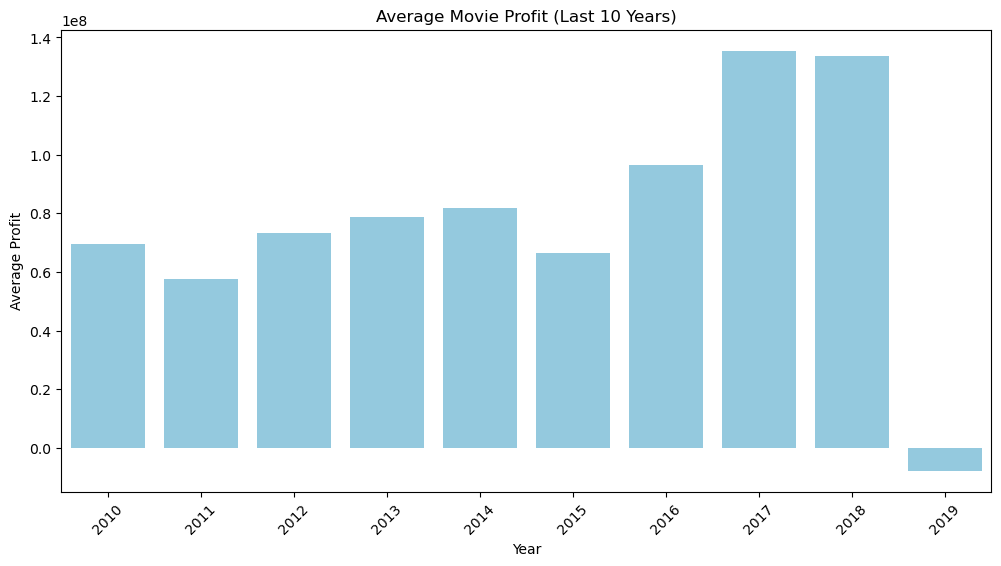

In [138]:
#the last 10 years
last_10_years = sorted(merged_df['year'].dropna().unique())[-10:]
profit_last_10 = merged_df[merged_df['year'].isin(last_10_years)].groupby('year')['profit'].mean()
#plot the graph
plt.figure(figsize=(12,6))
sns.barplot(x=profit_last_10.index, y=profit_last_10.values, color='skyblue')
plt.title('Average Movie Profit (Last 10 Years)')
plt.xlabel('Year')
plt.ylabel('Average Profit')
plt.xticks(rotation=45)
plt.show()

This bar chart shows how profitability has changed yearly,showing periods of growth or decline in average earnings for movies.

VISUALISATION:2

We will now look at the top 10 most profitable movies

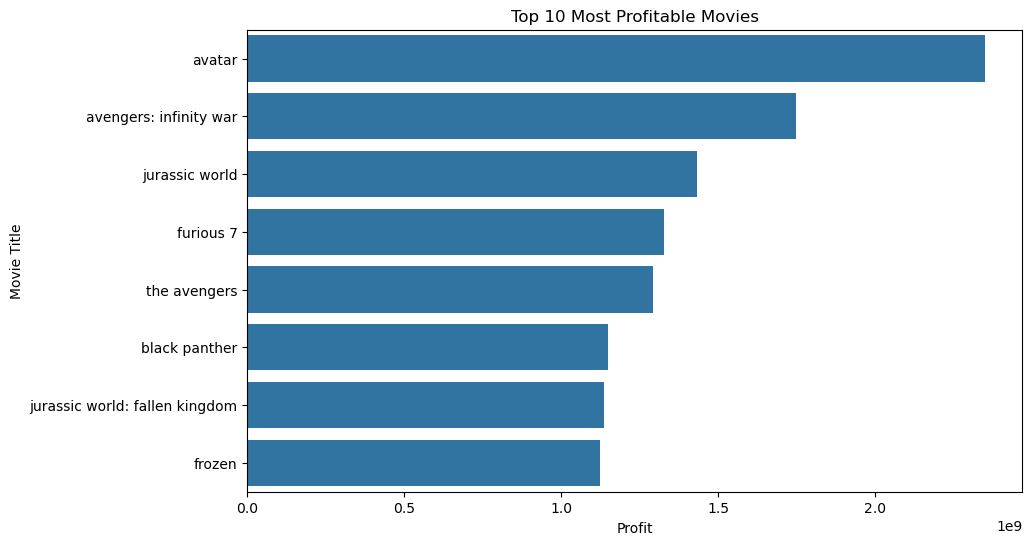

In [139]:
#Top 10 profitable movies
top_profit = merged_df[['movie', 'profit']].sort_values(by='profit', ascending=False).head(10)
# Plot the graph
plt.figure(figsize=(10,6))
sns.barplot(y=top_profit['movie'], x=top_profit['profit'])
plt.title('Top 10 Most Profitable Movies')
plt.xlabel('Profit')
plt.ylabel('Movie Title')
plt.show()


It ranks the top ten movies by their total profit and identifies which movies have generated the most profitability compared to other films.



VISUALISATION: 3

We will check on the ROI distribution by genre (Top 5 only)

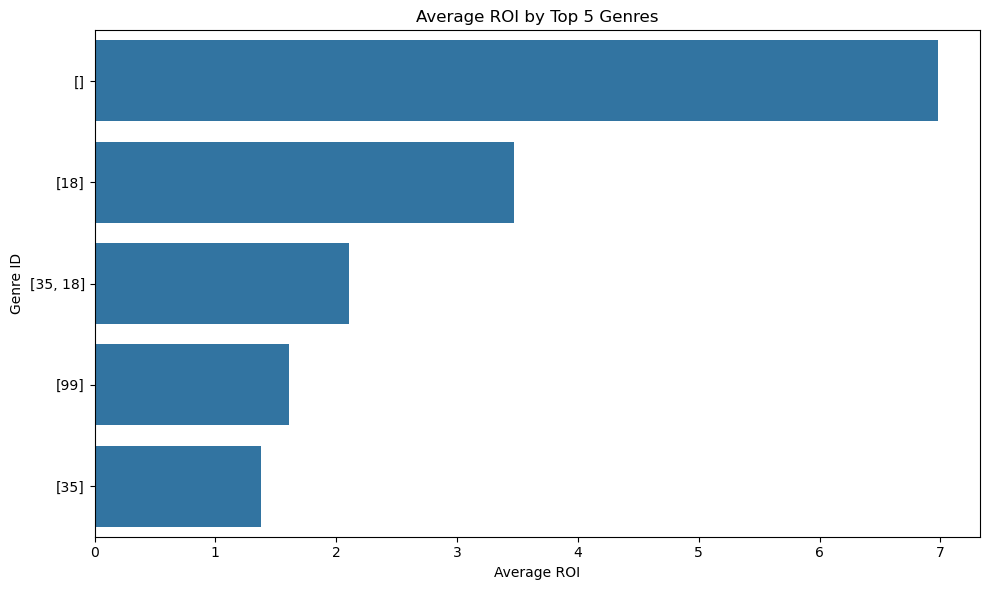

In [140]:
# Calculate ROI
merged_df['roi'] = merged_df['profit'] / merged_df['production_budget']
#Explode genre_ids
genre_roi = merged_df.explode('genre_ids')
#Get top 5 most common genres
top_genres = genre_roi['genre_ids'].value_counts().head(5).index
#Filter only top genres
filtered = genre_roi[genre_roi['genre_ids'].isin(top_genres)]
# Group by genre and calculate average ROI
avg_roi = filtered.groupby('genre_ids')['roi'].mean().sort_values(ascending=False)
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=avg_roi.values, y=avg_roi.index)
plt.title('Average ROI by Top 5 Genres')
plt.xlabel('Average ROI')
plt.ylabel('Genre ID')
plt.tight_layout()
plt.show()


 This graph helps understand which genres give better financial efficiency relative to their production costs.



VISUALISATION: 4

We will look at average ROI by popularity quartile

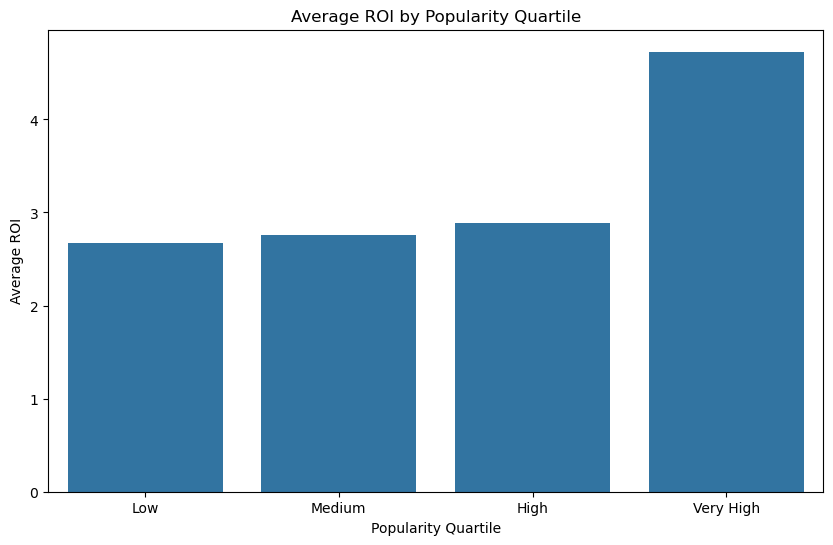

In [141]:
#create popularity quartiles
merged_df['popularity_quartile'] = pd.qcut(merged_df['popularity'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
#group by quartile and calculate average ROI
roi_by_quartile = merged_df.groupby('popularity_quartile', observed=True)['roi'].mean().sort_index()
#plot
plt.figure(figsize=(10,6))
sns.barplot(x=roi_by_quartile.index, y=roi_by_quartile.values)
plt.title('Average ROI by Popularity Quartile')
plt.xlabel('Popularity Quartile')
plt.ylabel('Average ROI')
plt.show()


This graph compares average ROI across four levels of movie popularity, divided into quartiles from low to very high popularity. It shows whether popular movies give better returns on their investments.



VISUALISATION:5

We will now look at the top 10 movies by ROI

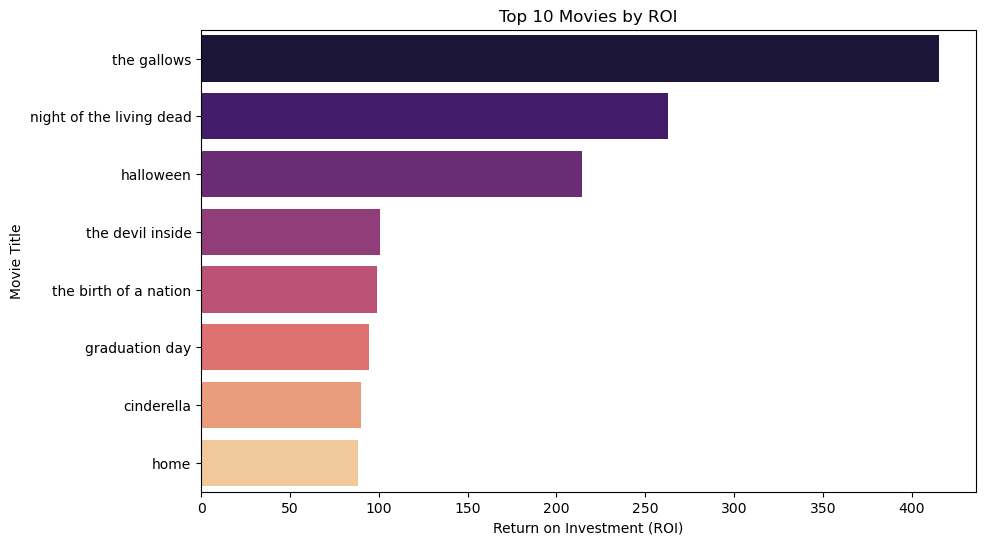

In [142]:
# Sort and select top 10 movies by ROI
top_roi = merged_df[['movie', 'roi']].sort_values(by='roi', ascending=False).head(10)
# Plot
plt.figure(figsize=(10,6))
sns.barplot(y='movie', x='roi', data=top_roi, hue='movie', palette='magma', legend=False)
plt.title('Top 10 Movies by ROI')
plt.xlabel('Return on Investment (ROI)')
plt.ylabel('Movie Title')
plt.show()


The grapgh  shows which movies were most efficient at turning their budgets into profits.

RECOMMENDATIONS

Identify the years with high average profits.

Analyze top 10 most profitable movies .

Focus on producing films in high-ROI genres.

Invest in strategies that boost movie popularity.

Maximise on budget use to maximize ROI.

NAME: Nicole Kagendo Chabari

STUDENT PACE: Full time

SCHEDULED PROJECT REVIEW DATE/TIME: 5th August 2025/ 12PM

INSTRUCTOR NAME: Asha Deen

BLOG POST URL: